# Heart Failure Prediction using different ML Model
Importing libraries

In [1]:
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import log_loss

In [2]:
#Loading the dataset
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
# df.drop('id', axis=1, inplace=True)

# Data Preprocessing

In [3]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
#Checking for null values
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
# #replacing the missing values with the most frequent value
# df['bmi'].fillna(df['bmi'].mode()[0], inplace=True)

In [6]:
#Checking the value count in each column
print(df['ChestPainType'].value_counts())
print(df['RestingECG'].value_counts())
print(df['Sex'].value_counts())
print(df['ExerciseAngina'].value_counts())
print(df['ST_Slope'].value_counts())

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64
RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64
Sex
M    725
F    193
Name: count, dtype: int64
ExerciseAngina
N    547
Y    371
Name: count, dtype: int64
ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64


In [7]:
#using labelencoder for convert from catagorical to numerical
from sklearn.preprocessing import LabelEncoder
Encoder = LabelEncoder()

In [8]:
df['Sex'] = Encoder.fit_transform(df['Sex'])
df['ChestPainType'] = Encoder.fit_transform(df['ChestPainType'])
df['RestingECG'] = Encoder.fit_transform(df['RestingECG'])
df['ExerciseAngina'] = Encoder.fit_transform(df['ExerciseAngina'])
df['ST_Slope'] = Encoder.fit_transform(df['ST_Slope'])

In [9]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [10]:
# using minmax scalar for reduse the variance from the data
# from sklearn.preprocessing import StandardScaler
# std_scaler = StandardScaler()
from sklearn.preprocessing import MinMaxScaler
scaler =MinMaxScaler()

In [11]:
df[['MaxHR', 'Cholesterol', 'Age', 'RestingBP']] = scaler.fit_transform(df[['MaxHR', 'Cholesterol', 'Age', 'RestingBP']])

In [12]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,0.244898,1,1,0.70,0.479270,0,1,0.788732,0,0.0,2,0
1,0.428571,0,2,0.80,0.298507,0,1,0.676056,0,1.0,1,1
2,0.183673,1,1,0.65,0.469320,0,2,0.267606,0,0.0,2,0
3,0.408163,0,0,0.69,0.354892,0,1,0.338028,1,1.5,1,1
4,0.530612,1,2,0.75,0.323383,0,1,0.436620,0,0.0,2,0


# Exploratory Data Analysis
Find correlation between the variables

<Axes: >

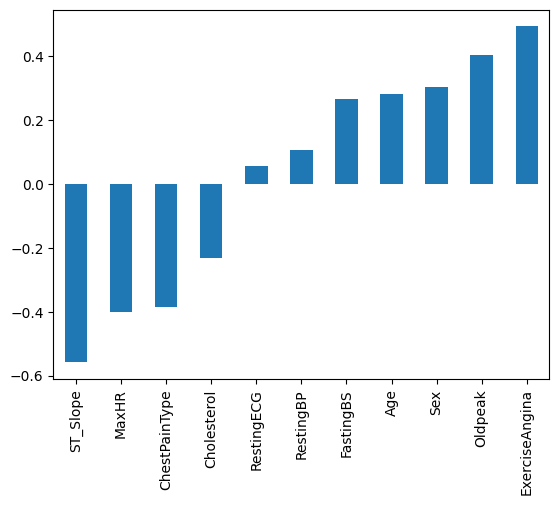

In [13]:
df.corr()['HeartDisease'][:-1].sort_values().plot(kind='bar')

<Axes: >

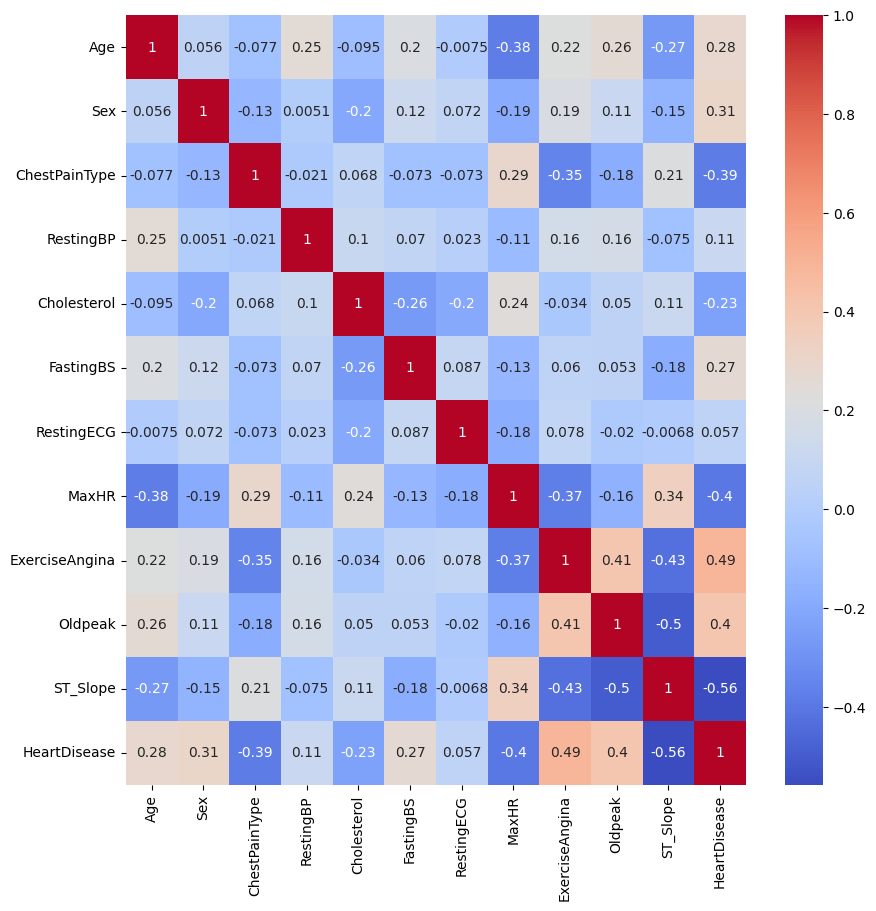

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True,cmap="coolwarm")

In [ ]:
# # replace age with number wrt to age group
# # 0 = 0-12 , 1 = 13-19 , 2 = 20-30 , 3 = 31-60 , 4 = 61-100 
# df['age'] = pd.cut(x=df['age'], bins=[0, 12, 19, 30, 60, 100], labels=[0, 1, 2, 3,4])
# df.head()

# Visulaizing the data

<Axes: xlabel='Sex', ylabel='count'>

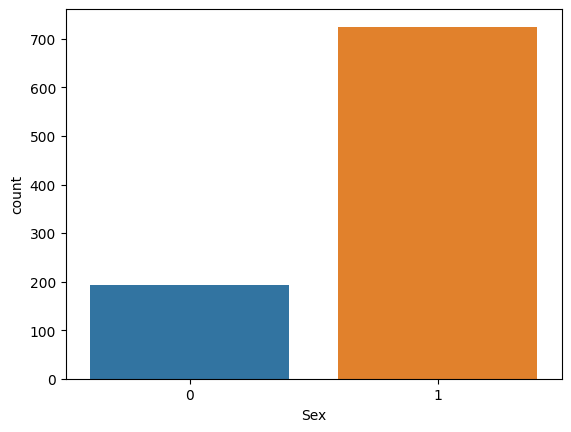

In [15]:
sns.countplot(x = 'Sex', data = df)

<Axes: xlabel='FastingBS', ylabel='count'>

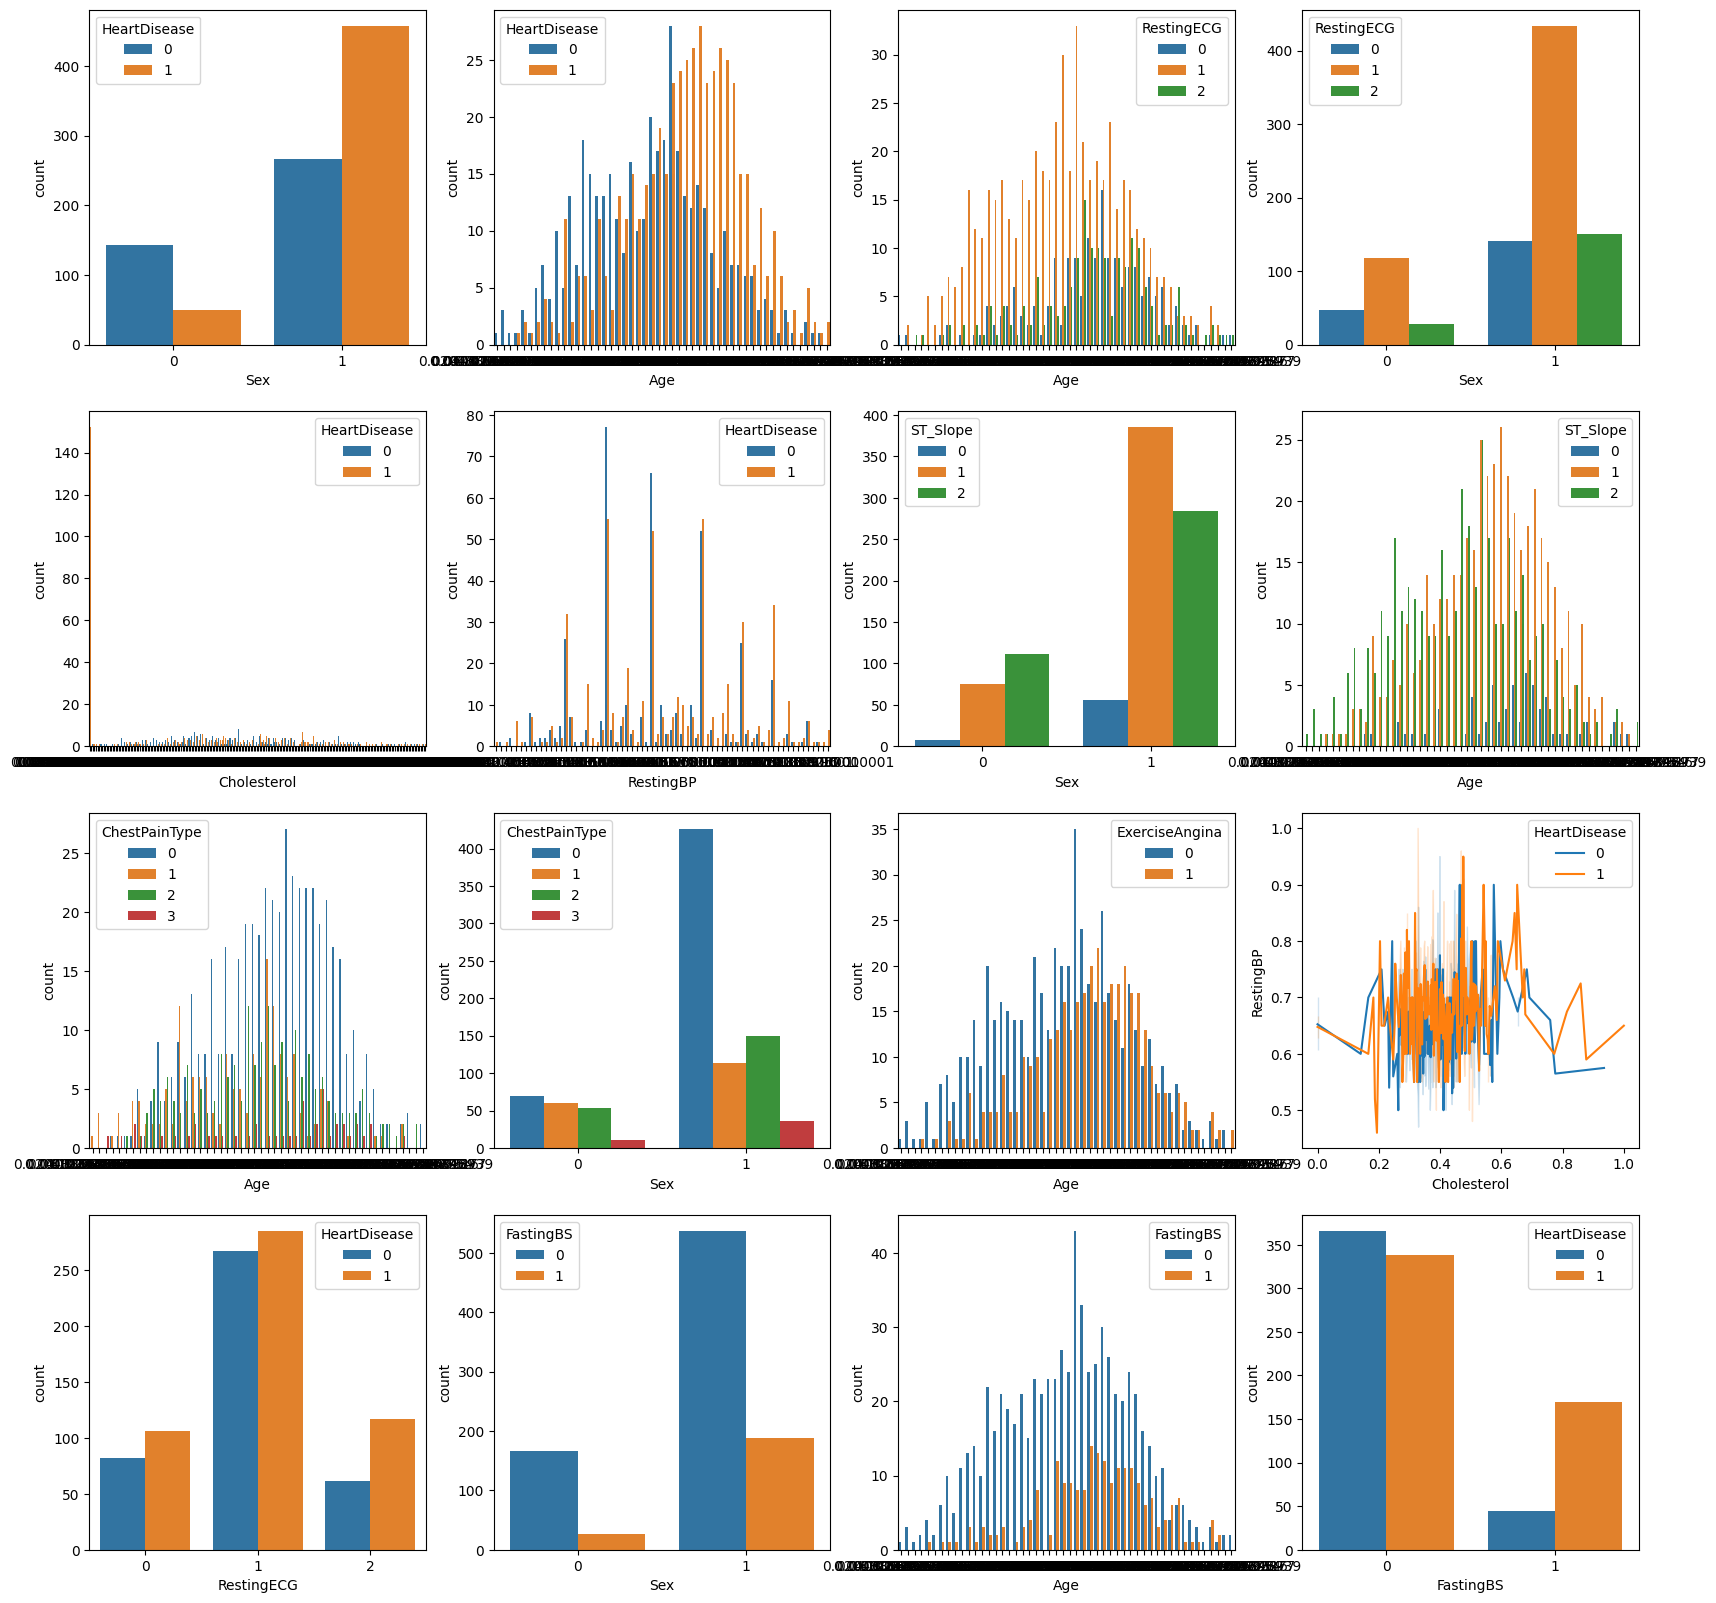

In [16]:
fig, ax = plt.subplots(4,4,figsize=(20, 20))
sns.countplot(x = 'Sex', data = df,hue = 'HeartDisease', ax=ax[0,0])
sns.countplot(x = 'Age', data = df,hue = 'HeartDisease', ax=ax[0,1])
sns.countplot(x = 'Age', data = df,hue = 'RestingECG', ax=ax[0,2])
sns.countplot(x = 'Sex', data = df,hue = 'RestingECG', ax=ax[0,3])
sns.countplot(x = 'Cholesterol', data = df,hue = 'HeartDisease', ax=ax[1,0])
sns.countplot(x = 'RestingBP', data = df,hue = 'HeartDisease', ax=ax[1,1])
sns.countplot(x = 'Sex', data = df,hue = 'ST_Slope', ax=ax[1,2])
sns.countplot(x = 'Age', data = df,hue = 'ST_Slope', ax=ax[1,3])
sns.countplot(x = 'Age', data = df,hue = 'ChestPainType', ax=ax[2,0])
sns.countplot(x = 'Sex', data = df,hue = 'ChestPainType', ax=ax[2,1])
sns.countplot(x = 'Age', data = df,hue = 'ExerciseAngina', ax=ax[2,2])
sns.lineplot(x = 'Cholesterol', y = 'RestingBP', data = df,hue = 'HeartDisease', ax=ax[2,3])
sns.countplot(x = 'RestingECG', data = df,hue = 'HeartDisease', ax=ax[3,0])
sns.countplot( x = 'Sex', data = df,hue = 'FastingBS', ax=ax[3,1])
sns.countplot(x = 'Age', data = df,hue = 'FastingBS', ax=ax[3,2])
sns.countplot(x = 'FastingBS', data = df,hue = 'HeartDisease', ax=ax[3,3])

# Train Test Split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('HeartDisease', axis=1), df['HeartDisease'], test_size=0.2, random_state=42)

# Model Training
Logistic Regression

In [18]:
lr = LogisticRegression()
lr

LogisticRegression()

In [19]:
#training the model
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.8478260869565217

In [20]:
#testing the model
lr_pred = lr.predict(X_test)
accuracy_score(y_test, lr_pred)

0.8478260869565217

# Support Vector Machine (SVM)

In [21]:
from sklearn.svm import SVC
svm = SVC()
svm

SVC()

In [22]:
#training the model
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.8532608695652174

In [23]:
#testing the model
sv_pred = svm.predict(X_test)
accuracy_score(y_test, sv_pred)

0.8532608695652174

# Decision Tree Classifier

In [24]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt

DecisionTreeClassifier()

In [25]:
#training the model
dt.fit(X_train, y_train)
dt.score(X_test, y_test)

0.8097826086956522

In [26]:
#testing the model
dt_pred = dt.predict(X_test)
accuracy_score(y_test, dt_pred)

0.8097826086956522

# K-Nearest Neighbors (KNN)

In [27]:
knn = KNeighborsClassifier()
knn

KNeighborsClassifier()

In [28]:
#training the model
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.842391304347826

In [29]:
#testing the model
knn_pred = knn.predict(X_test)
accuracy_score(y_test, knn_pred)

0.842391304347826

# RandomForestClassifier

In [46]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier()
rfc

RandomForestClassifier()

In [47]:
#training the model
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)
# rnf.score(X_train, y_train)

0.8967391304347826

In [48]:
#testing the model
rfc_pred = rfc.predict(X_test)
accuracy_score(y_test, rfc_pred)

0.8967391304347826

In [140]:
# # using grid search for find optimal values for RF classifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV

# RFC = RandomForestClassifier(random_state=42)

# param_grid = { 
#     'n_estimators': [10, 100, 200, 500],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'max_depth' : [4,5,6,7,8,9],
#     'criterion' :['gini', 'entropy']
# }

# grid = GridSearchCV(estimator=RFC, param_grid=param_grid, cv= 5, scoring='accuracy', return_train_score=False, verbose=1)
# grid_search = grid.fit(X_train, y_train)

# print(grid_search.best_params_)

In [33]:
# from sklearn.ensemble import GradientBoostingClassifier
# GradientBoostingClassifier = GradientBoostingClassifier(
#     learning_rate=0.01,
#     max_depth=8,
#     max_features=0.5,
#     min_samples_leaf=17,
#     min_samples_split=6,
#     n_estimators=100,
#     subsample=0.6,
#     random_state=42
# )
# GradientBoostingClassifier.fit(X_train, y_train)
# acc_GBC=GradientBoostingClassifier.score(X_train, y_train) 
# GBC = GradientBoostingClassifier.score(X_test, y_test)
# print("Train: ", acc_GBC)
# print("Test: ", GBC)

Train:  0.8869209809264306
Test:  0.875


# Model Evaluation
Logistic Regression

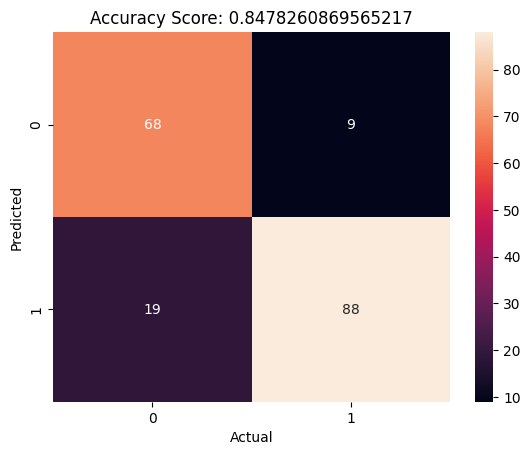

In [49]:
sns.heatmap(metrics.confusion_matrix(y_test, lr_pred), annot=True, fmt='d')
plt.title('Accuracy Score: {}'.format(accuracy_score(y_test, lr_pred)))
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.show()

In [50]:
print('Logistic Regression Model Accuracy Score:',accuracy_score(y_test, lr_pred))
print('Logistic Regression Model F1 score: ',metrics.f1_score(y_test, lr_pred))
print('Logistic Regression Model Mean Absolute Error: ',metrics.mean_absolute_error(y_test, lr_pred))
print('Logistic Regression Model Mean Squared Error: ',metrics.mean_squared_error(y_test, lr_pred))
print('Logistic Regression Model log loss: ',log_loss(y_test, lr_pred))

Logistic Regression Model Accuracy Score: 0.8478260869565217
Logistic Regression Model F1 score:  0.8627450980392157
Logistic Regression Model Mean Absolute Error:  0.15217391304347827
Logistic Regression Model Mean Squared Error:  0.15217391304347827
Logistic Regression Model log loss:  5.484903776604784


# Support Vector Machine (SVM)

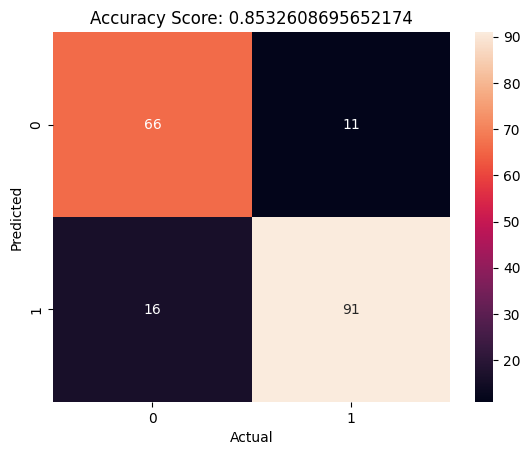

In [51]:
sns.heatmap(metrics.confusion_matrix(y_test, sv_pred), annot=True, fmt='d')
plt.title('Accuracy Score: {}'.format(accuracy_score(y_test, sv_pred)))
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.show()

In [52]:
print('SVM Model Accuracy Score:',accuracy_score(y_test, sv_pred))
print('SVM Model F1 score: ',metrics.f1_score(y_test, sv_pred))
print('SVM Model Mean Absolute Error: ',metrics.mean_absolute_error(y_test, sv_pred))
print('SVM Model Mean Squared Error: ',metrics.mean_squared_error(y_test, sv_pred))
print('SVM Model log loss: ',log_loss(y_test, sv_pred))

SVM Model Accuracy Score: 0.8532608695652174
SVM Model F1 score:  0.8708133971291867
SVM Model Mean Absolute Error:  0.14673913043478262
SVM Model Mean Squared Error:  0.14673913043478262
SVM Model log loss:  5.289014356011756


# Decision Tree Classifier

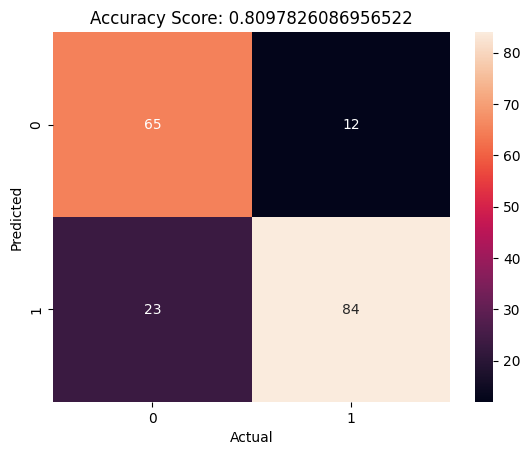

In [53]:
sns.heatmap(metrics.confusion_matrix(y_test, dt_pred), annot=True, fmt='d')
plt.title('Accuracy Score: {}'.format(accuracy_score(y_test, dt_pred)))
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.show()

In [54]:
print('Decision Tree Model Accuracy Score:',accuracy_score(y_test, dt_pred))
print('Decision Tree Model F1 score: ',metrics.f1_score(y_test, dt_pred))
print('Decision Tree Model Mean Absolute Error: ',metrics.mean_absolute_error(y_test, dt_pred))
print('Decision Tree Model Mean Squared Error: ',metrics.mean_squared_error(y_test, dt_pred))
print('Decision Tree Model log loss: ',log_loss(y_test, dt_pred))

Decision Tree Model Accuracy Score: 0.8097826086956522
Decision Tree Model F1 score:  0.8275862068965517
Decision Tree Model Mean Absolute Error:  0.19021739130434784
Decision Tree Model Mean Squared Error:  0.19021739130434784
Decision Tree Model log loss:  6.85612972075598


# K-Nearest Neighbors (KNN)

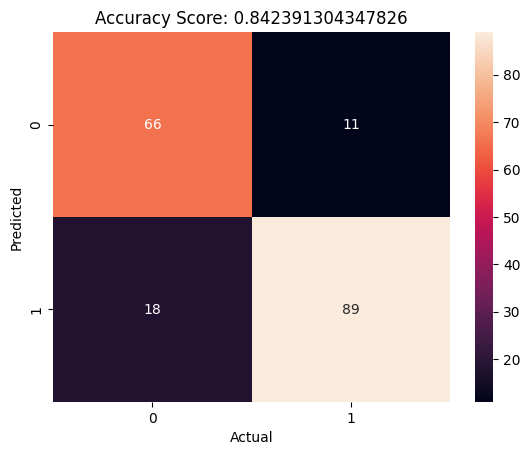

In [55]:
sns.heatmap(metrics.confusion_matrix(y_test, knn_pred), annot=True, fmt='d')
plt.title('Accuracy Score: {}'.format(accuracy_score(y_test, knn_pred)))
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.show()

In [56]:
print('KNN Model Accuracy Score:',accuracy_score(y_test, knn_pred))
print('KNN Model F1 score: ',metrics.f1_score(y_test, knn_pred))
print('KNN Model Mean Absolute Error: ',metrics.mean_absolute_error(y_test, knn_pred))
print('KNN Model Mean Squared Error: ',metrics.mean_squared_error(y_test, knn_pred))
print('KNN Model log loss: ',log_loss(y_test, knn_pred))

KNN Model Accuracy Score: 0.842391304347826
KNN Model F1 score:  0.8599033816425121
KNN Model Mean Absolute Error:  0.15760869565217392
KNN Model Mean Squared Error:  0.15760869565217392
KNN Model log loss:  5.680793197197812


# RandomForestClassifier

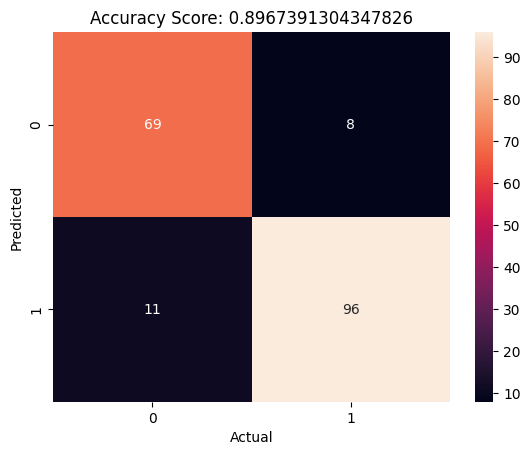

In [58]:
sns.heatmap(metrics.confusion_matrix(y_test, rfc_pred), annot=True, fmt='d')
plt.title('Accuracy Score: {}'.format(accuracy_score(y_test, rfc_pred)))
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.show()

In [59]:
print('Random Forest Model Accuracy Score:',accuracy_score(y_test, rfc_pred))
print('Random Forest F1 score: ',metrics.f1_score(y_test, rfc_pred))
print('Random Forest Mean Absolute Error: ',metrics.mean_absolute_error(y_test, rfc_pred))
print('Random Forest Mean Squared Error: ',metrics.mean_squared_error(y_test, rfc_pred))
print('Random Forest Model log loss: ',log_loss(y_test, rfc_pred))

Random Forest Model Accuracy Score: 0.8967391304347826
Random Forest F1 score:  0.9099526066350712
Random Forest Mean Absolute Error:  0.10326086956521739
Random Forest Mean Squared Error:  0.10326086956521739
Random Forest Model log loss:  3.7218989912675324


# Model Comparison

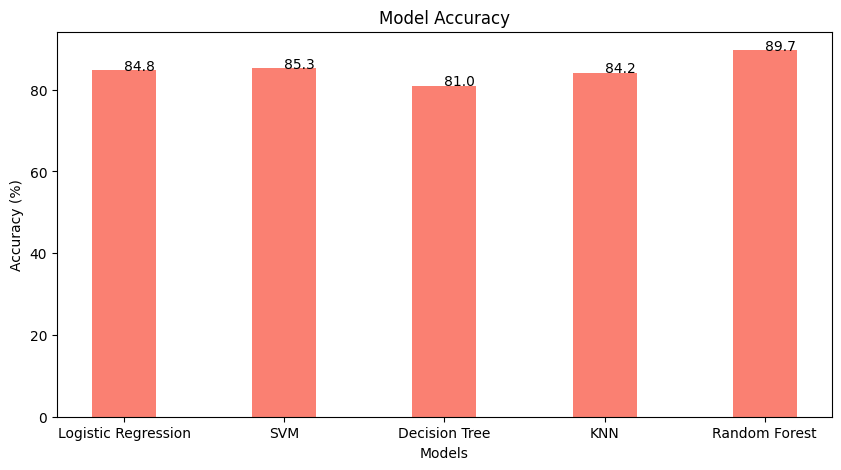

In [86]:
# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])
models = ['Logistic Regression', 'SVM', 'Decision Tree', 'KNN','Random Forest']
accuracy = [round(accuracy_score(y_test, lr_pred),3)*100, round(accuracy_score(y_test, sv_pred),3)*100, round(accuracy_score(y_test, dt_pred),3)*100, round(accuracy_score(y_test, knn_pred),3)*100,round(accuracy_score(y_test, rfc_pred),3)*100]
plt.figure(figsize=(10,5))
plt.bar(models, accuracy, color = 'salmon', width = 0.4)
addlabels(models, accuracy)
plt.xlabel('Models')
plt.ylabel('Accuracy'+str(' (%)'))
plt.title('Model Accuracy')
plt.show()

# Conclusion
The model accuracies of Logistic Regression,  Decision Tree and KNN are bellow 85% i.e. corresponding accuracy is 84.8%, 81.0%, 84.2% . The accuracy of SVM Classifier is 85.3%.But we show that the accuracy of Random Forest classifier is so high then the others model.It's accuracy is 89.7% . So, we can use random forest classifier model to predict the heart failure.
